Decision tree implementation

In [1]:
# Cell 1 — imports (clean)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

%matplotlib inline
sns.set_style("whitegrid")


In [2]:
# Cell 2 — load data & concise EDA
data = pd.read_csv('heart.csv')

# Basic info
print("Shape:", data.shape)
display(data.head())

# Column list
print("\nColumns:", list(data.columns))

# Missing values
print("\nMissing values per column:")
print(data.isna().sum())

# Target distribution
print("\nTarget value counts:")
print(data['target'].value_counts())

# Quick numeric summary (small)
display(data.describe().T[['count','mean','std','min','50%','max']])


Shape: (1025, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0



Columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

Missing values per column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Target value counts:
target
1    526
0    499
Name: count, dtype: int64


,count,mean,std,min,50%,max
age,1025.0,54.434146,9.072290,29.0,56.0,77.0
sex,1025.0,0.695610,0.460373,0.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,1.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,130.0,200.0
chol,1025.0,246.000000,51.592510,126.0,240.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,152.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.8,6.2


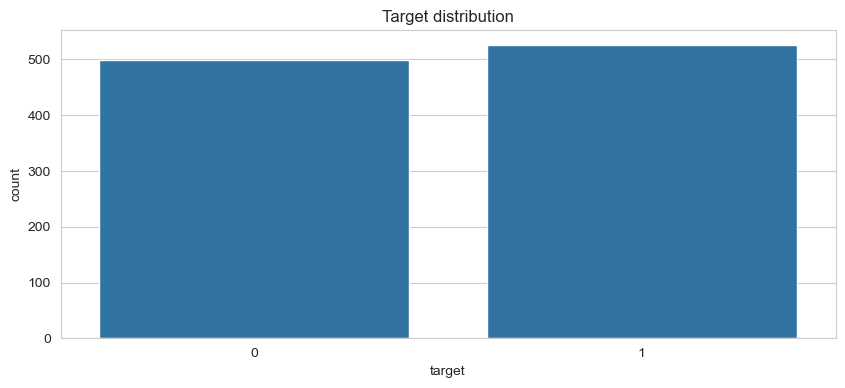

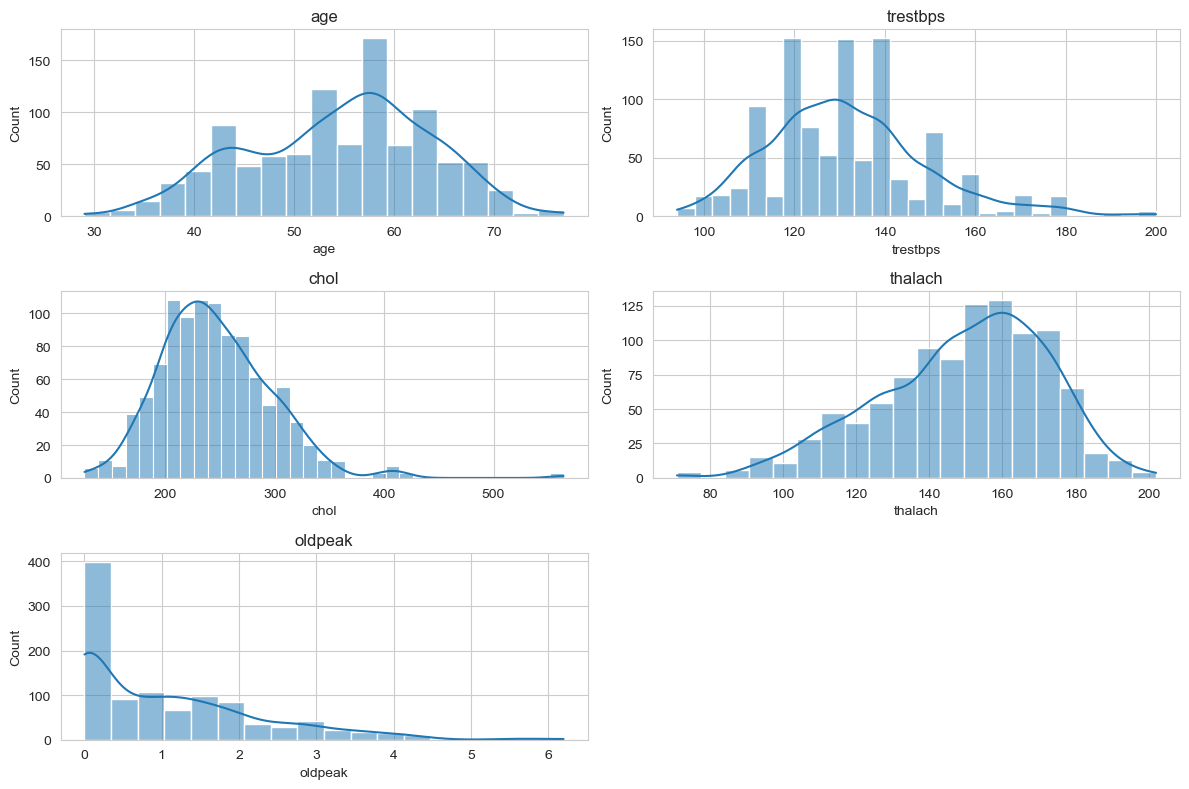

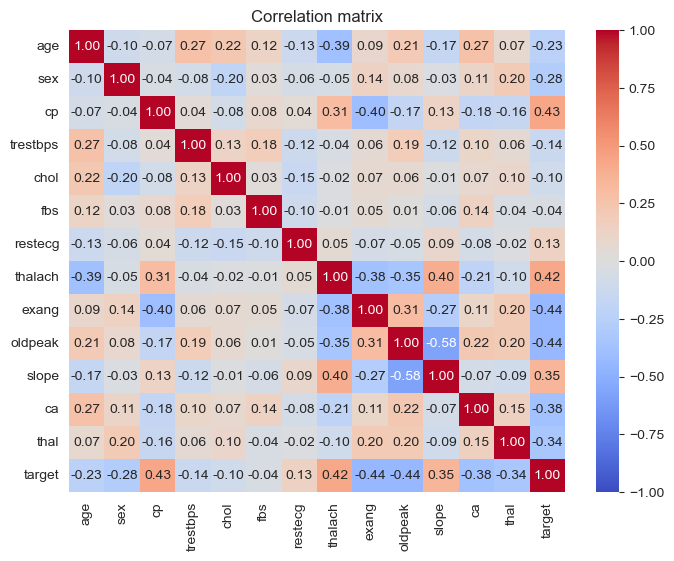

In [3]:
# Cell 3 — focused EDA plots (compact)
plt.figure(figsize=(10,4))
sns.countplot(x='target', data=data)
plt.title('Target distribution')
plt.show()

# Distribution of a few important numeric features
features = ['age','trestbps','chol','thalach','oldpeak']
plt.figure(figsize=(12,8))
for i, f in enumerate(features, 1):
    plt.subplot(3,2,i)
    sns.histplot(data, x=f, kde=True)
    plt.title(f)
plt.tight_layout()
plt.show()

# Correlation heatmap (small)
plt.figure(figsize=(8,6))
corr = data.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation matrix")
plt.show()


In [4]:
# Cell 4 — prepare features and target
target = 'target'
X = data.drop(columns=[target])
y = data[target]

print("Features shape:", X.shape, "Target shape:", y.shape)
print("\nFeature columns:", list(X.columns))


Features shape: (1025, 13) Target shape: (1025,)

Feature columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [5]:
# Cell 5 — train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("y_train:", y_train.shape, "y_test:", y_test.shape)


X_train: (820, 13) X_test: (205, 13)
y_train: (820,) y_test: (205,)


In [6]:
# Cell 6 — train decision tree and show accuracy
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")   # printed clearly at top


Accuracy: 0.8390



Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.80      0.83       100
           1       0.82      0.88      0.85       105

    accuracy                           0.84       205
   macro avg       0.84      0.84      0.84       205
weighted avg       0.84      0.84      0.84       205



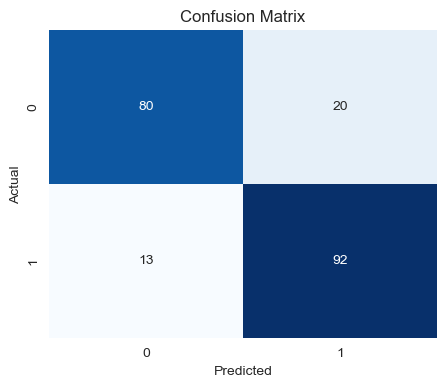

In [7]:
# Cell 7 — classification report & confusion matrix
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


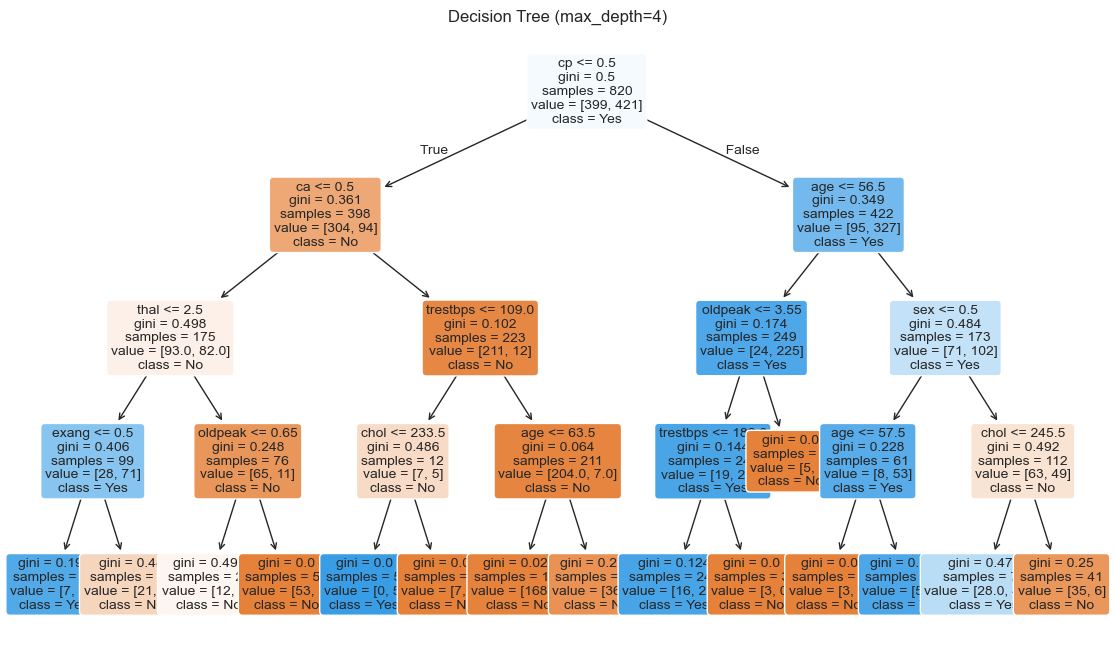

In [8]:
# Cell 8 — plot tree (compact)
plt.figure(figsize=(14,8))
plot_tree(clf, feature_names=X.columns, class_names=['No','Yes'], filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree (max_depth=4)")
plt.show()
